In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [48]:
pf = pd.read_csv('../Documents/wine.data')
pf= pf.rename( columns={'1':'clase', '14.23': 'Alcohol', '1.71': 'Acido Malico','2.43': 'Ceniza', '15.6': 'Alcalinidad de la ceniza'
    ,'127': 'magnesio','2.8': 'Fenoles totales','3.06': 'Flavonoides', '.28': 'Fenoles no flavonoides', '2.29': 'Proantocianinas',
     '5.64': 'Intensidad olor' , '1.04': 'Tono','3.92': 'OD280/0D315',  '1065': 'Prolina'
                          })

pf.head(20)

,clase,Alcohol,Acido Malico,Ceniza,Alcalinidad de la ceniza,magnesio,Fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,Intensidad olor,Tono,OD280/0D315,Prolina
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510


In [49]:
pf.shape

(177, 14)

In [50]:
pf.describe()

,clase,Alcohol,Acido Malico,Ceniza,Alcalinidad de la ceniza,magnesio,Fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,Intensidad olor,Tono,OD280/0D315,Prolina
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([58.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

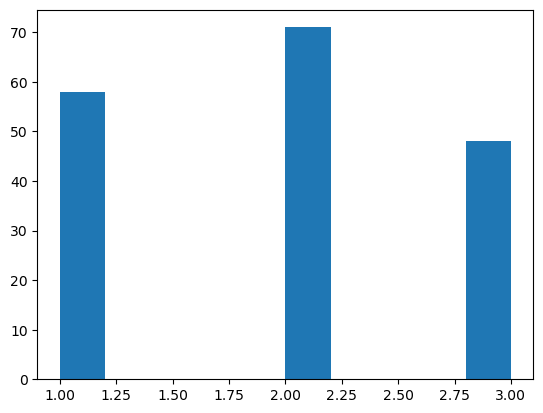

In [51]:

plt.hist(pf.clase)

In [83]:
predictors_col = ["Alcohol", "Acido Malico", "Ceniza", "Alcalinidad de la ceniza"]
target_col = ['clase']

In [84]:
predictors = pf[predictors_col]
target = pf[target_col]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [93]:
fig=plt.figure(figsize=(50,50))
tree = DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train)

<Figure size 5000x5000 with 0 Axes>

[Text(0.38425925925925924, 0.9375, 'x[0] <= 12.79\ngini = 0.659\nsamples = 141\nvalue = [46, 56, 39]'),
 Text(0.18518518518518517, 0.8125, 'x[0] <= 12.44\ngini = 0.27\nsamples = 56\nvalue = [0, 47, 9]'),
 Text(0.1111111111111111, 0.6875, 'x[1] <= 4.575\ngini = 0.091\nsamples = 42\nvalue = [0, 40, 2]'),
 Text(0.07407407407407407, 0.5625, 'x[1] <= 3.81\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(0.037037037037037035, 0.4375, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.1111111111111111, 0.4375, 'x[1] <= 4.095\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.07407407407407407, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.14814814814814814, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.14814814814814814, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.25925925925925924, 0.6875, 'x[2] <= 2.06\ngini = 0.5\nsamples = 14\nvalue = [0, 7, 7]'),
 Text(0.2222222222222222, 0.5625, 'gini = 0.0\nsamples = 4\nvalue = [0

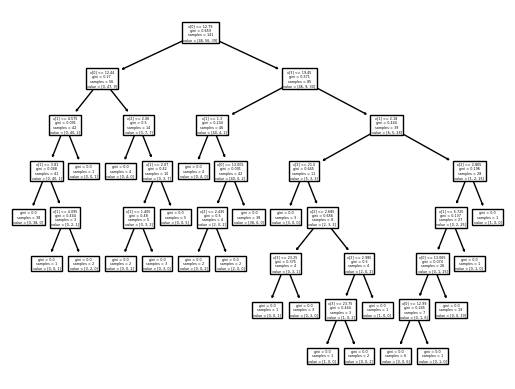

In [94]:
plot_tree(arbol)

In [88]:
predicciones = arbol.predict(X_test)

In [89]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,1,2,3
Actual,,,
1,12,0,0
2,0,12,3
3,1,2,6


In [90]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.8333333333333334